# Learning

1st lets do a simple model from the MESA demo


In [84]:
import mesa
import seaborn as sns
import numpy as np
import pandas as pd
import random
from tqdm.auto import tqdm

In [85]:
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum(xi * (N - i) for i, xi in enumerate(x)) / (N * sum(x))
    return 1 + (1 / N) - 2 * B

In [86]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth"""
    
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model) # Pass through params to parent class
        self.wealth = 2 # Create the agent's variable and set initial value
        
    def step(self):
      
        if self.wealth > 0:
            other_agent = random.choice(self.model.schedule.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1
            

In [87]:
class MoneyModel(mesa.Model):
    """A model with some number of agents"""
    
    def __init__(self, N):
        super().__init__()
        self.num_agents = N
        self.schedule = mesa.time.RandomActivation(self) # Randomly activate each agent each step
        # random.seed(10)
        
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
        
        self.datacollector = mesa.DataCollector(
            model_reporters={"Gini": compute_gini}, agent_reporters={"Wealth": "wealth"}
        )

    def step(self):
        self.schedule.step()
        self.datacollector.collect(self)

In [88]:
test_model = MoneyModel(12)

In [89]:
for i in range(12):
    test_model.step()

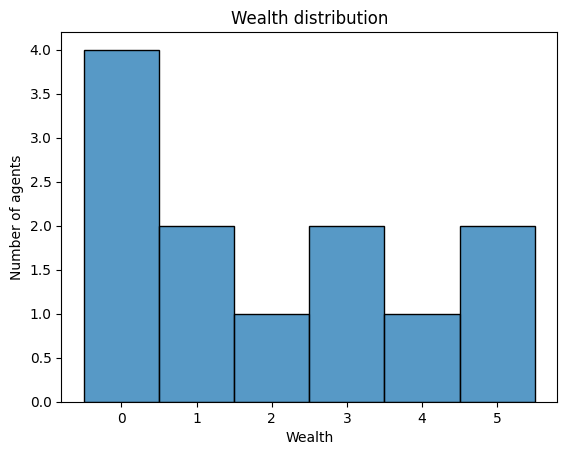

In [90]:
agent_wealth = [a.wealth for a in test_model.schedule.agents]
# Create a histogram with seaborn
g = sns.histplot(agent_wealth, discrete=True)
g.set(
    title="Wealth distribution", xlabel="Wealth", ylabel="Number of agents"
);  # The semicolon is just to avoid printing the object representation

In [97]:
all_wealth = []
# This runs the model 100 times, each model executing 10 steps.
for j in tqdm(range(100)):
    # Run the model
    model = MoneyModel(100)
    for i in range(100):
        model.step()

  0%|          | 0/100 [00:00<?, ?it/s]

[Text(0.5, 1.0, 'Gini coeff'), Text(0, 0.5, 'Gini coeff')]

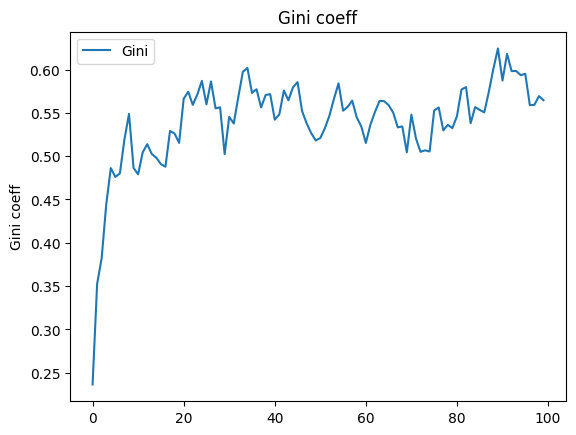

In [92]:
gini = model.datacollector.get_model_vars_dataframe()

g = sns.lineplot(data=gini)
g.set(title='Gini coeff', ylabel='Gini coeff')

In [98]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth

Wealth
Step AgentID        
1    27            1
     31            3
     14            4
     67            1
     5             1
...              ...
100  19            0
     17            1
     94            2
     46            0
     52            1

[10000 rows x 1 columns]

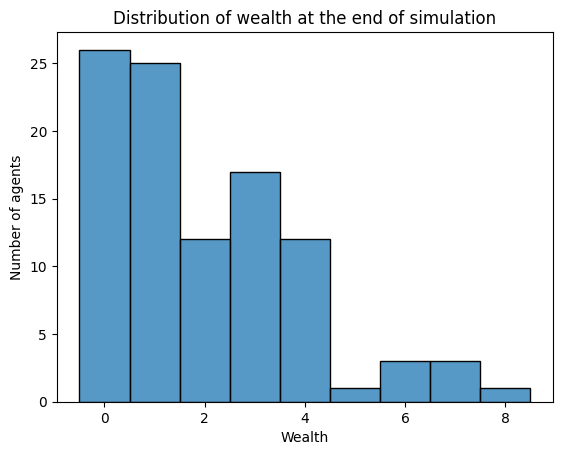

In [100]:
last_step = agent_wealth.index.get_level_values("Step").max()
end_wealth = agent_wealth.xs(last_step, level="Step")["Wealth"]
# Create a histogram of wealth at the last step
g = sns.histplot(end_wealth, discrete=True)
g.set(
    title="Distribution of wealth at the end of simulation",
    xlabel="Wealth",
    ylabel="Number of agents",
);